**Importing the Dependencies**

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from flask import Flask, request, render_template, render_template_string
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import streamlit as st
from tensorflow import keras

**Create Flask app**

In [6]:
app = Flask(__name__)

**Prepare data**

In [7]:
Real_File = os.listdir('D:\deepfake_detector\Data\Real')
print(Real_File[0:5])
print(Real_File[-5:])

['Real (1).jpg', 'Real (10).jpg', 'Real (100).jpg', 'Real (1000).jpg', 'Real (1001).jpg']
['Real (995).jpg', 'Real (996).jpg', 'Real (997).jpg', 'Real (998).jpg', 'Real (999).jpg']


In [8]:
Fake_File = os.listdir('D:\deepfake_detector\Data\Fake')
print(Fake_File[0:5])
print(Fake_File[-5:])

['Fake (1).jpg', 'Fake (10).jpg', 'Fake (100).jpg', 'Fake (1000).jpg', 'Fake (1001).jpg']
['Fake (995).jpg', 'Fake (996).jpg', 'Fake (997).jpg', 'Fake (998).jpg', 'Fake (999).jpg']


In [9]:
print('Number of real images:', len(Real_File))
print('Number of fake images:', len(Fake_File))

Number of real images: 2000
Number of fake images: 2000


**Creating Labels for the two class of Images**

Real Image  -->  1

Fake Image  -->  0

**1.Load data**

**2.Image processing**

a. Resize the Images

b. Convert the images to numpy arrays+

In [10]:
real_path='D:\deepfake_detector\Data\Real'
fake_path='D:\deepfake_detector\Data\Fake'

def load_data(real_path, fake_path):
    real_files = os.listdir(real_path)
    fake_files = os.listdir(fake_path)

    data = []
    labels = []

    for img_file in real_files:
        image = Image.open(os.path.join(real_path, img_file)).resize((128, 128)).convert('RGB')
        data.append(np.array(image))
        labels.append(1)  # Real images

    for img_file in fake_files:
        image = Image.open(os.path.join(fake_path, img_file)).resize((128, 128)).convert('RGB')
        data.append(np.array(image))
        labels.append(0)  # Fake images
  
    return np.array(data), np.array(labels)


**Displaying the Images**

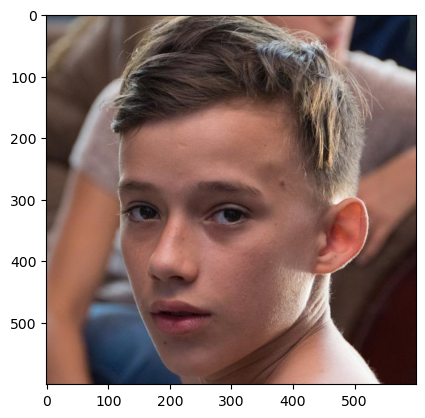

In [11]:
# displaying with real image
img = mpimg.imread('D:\deepfake_detector\Data\Real\Real (1).jpg')
imgplot = plt.imshow(img)
plt.show()

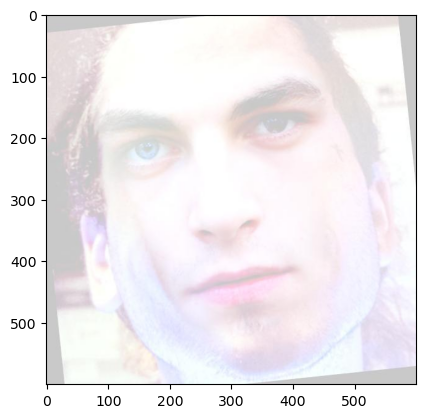

In [12]:
# displaying fake image
img = mpimg.imread('D:\deepfake_detector\Data\Fake\Fake (1).jpg')
imgplot = plt.imshow(img)
plt.show()

**Load the dataset**

In [13]:
X, Y = load_data('D:\deepfake_detector\Data\Real', 'D:\deepfake_detector\Data\Fake')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Create and train the model**

In [14]:
# Building a Convolutional Neural Networks (CNN)
def create_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    # compile the neural network
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# training the neural network
history=model.fit(X_train / 255.0, Y_train, validation_data=(X_test / 255.0, Y_test), epochs=10, batch_size=32)

c:\Users\asmaa\anaconda3\envs\project\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 293ms/step - accuracy: 0.5007 - loss: 1.0359 - val_accuracy: 0.6313 - val_loss: 0.6797
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.6338 - loss: 0.6488 - val_accuracy: 0.6888 - val_loss: 0.5812
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 244ms/step - accuracy: 0.7412 - loss: 0.5151 - val_accuracy: 0.8263 - val_loss: 0.4335
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.8384 - loss: 0.3508 - val_accuracy: 0.8625 - val_loss: 0.3195
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.8933 - loss: 0.2407 - val_accuracy: 0.8650 - val_loss: 0.2942
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - accuracy: 0.9282 - loss: 0.1783 - val_accuracy: 0.8963 - val_loss: 0.2411
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9414 - loss: 0.1343 - val_accuracy: 0.9087 - val_loss: 0.2002
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9582 - loss: 0

**Model Evaluation**

In [15]:
loss, accuracy = model.evaluate(X_test / 255.0, Y_test)
print('Test Accuracy =', accuracy)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9339 - loss: 0.2297
Test Accuracy = 0.925000011920929


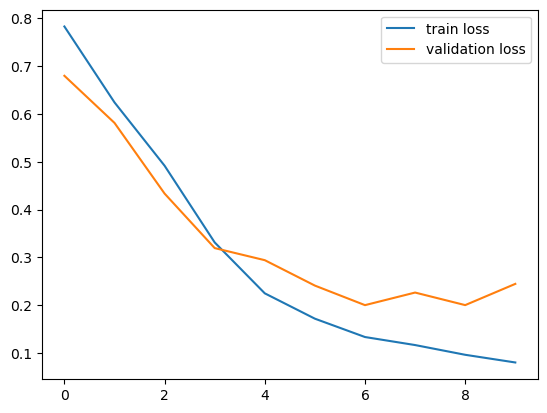

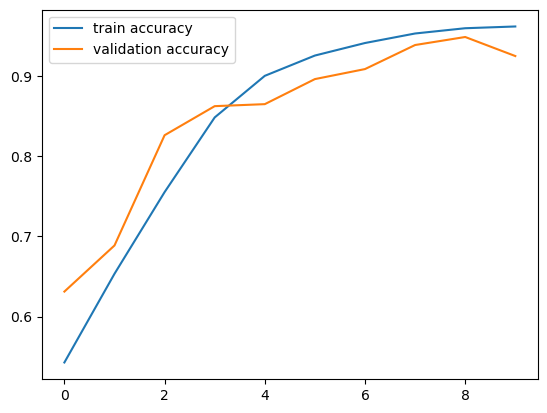

In [16]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()



**Save the model**

In [17]:
model.save('model/deepfake_detector.h5', include_optimizer=False)

**Load the trained model**

In [18]:
model.compile()
model = keras.models.load_model('model/deepfake_detector.h5')

**Predict function**

In [19]:
# Get the path of the image from user input
def predict_image(image_path):
    
    # Read the image
    image = cv2.imread(image_path)
    
# # Check if the image was loaded successfully
# if image_ is None:
#     print("Unable to load the image. Please check the path.")
# else:
#     # Skip displaying the image for faster processing

    # Resize the image
    image_resized = cv2.resize(image, (128, 128))
    
    # Scale the image
    image_scaled = image_resized.astype('float32') / 255.0
    
    # Reshape the image for the model
    image_reshaped = np.reshape(image_scaled, [1, 128, 128, 3])
    
    # Predict using the model
    prediction = model.predict(image_reshaped)
    
    # Print the prediction
    print(prediction)
    
    
    # Get the predicted label
    input_pred_label = np.argmax(prediction)

    # Print the predicted label
    print(input_pred_label)
    
    # Return the predicted label if the image is real or fake
    return "Real" if prediction[0][0] < 0.5 else "Fake"

In [20]:
# HTML Template
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Deepfake Detection</title>
</head>
<body>
    <h1>Upload an Image for Deepfake Detection</h1>
    <form action="/upload" method="post" enctype="multipart/form-data">
        <input type="file" name="file" required>
        <input type="submit" value="Upload">
    </form>
    {% if result %}
        <h2>The image is: {{ result }}</h2>
    {% endif %}
</body>
</html>
"""

**Routes**

In [27]:
# Define the routes
from flask import Flask, request, render_template, render_template_string
app = Flask(__name__)



@app.route('/')
def index():
    return render_template_string(html_template)

@app.route('/upload', methods=['POST'])
def upload_image():
    if 'file' not in request.files:
        return "No file part"
    file = request.files['file']
    if file.filename == '':
        return "No selected file"
    
    filepath = os.path.join('uploads', file.filename)
    file.save(filepath)
    
    result = predict_image(filepath)
    return render_template_string(html_template, result=result)

# Run the app
if __name__ == '__main__':
    app.run(port=5000, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
INFO:werkzeug:Press CTRL+C to quit
127.0.0.1 - - [02/Oct/2024 02:00:17] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Oct/2024 02:00:17] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


127.0.0.1 - - [02/Oct/2024 02:00:32] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Oct/2024 02:00:32] "POST /upload HTTP/1.1" 200 -


[[5.409291e-06]]
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


127.0.0.1 - - [02/Oct/2024 02:00:41] "POST /upload HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Oct/2024 02:00:41] "POST /upload HTTP/1.1" 200 -


[[0.9766758]]
0
